# Titanic Classification

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LogisticRegression

In [117]:
df=pd.read_csv('Titanic-Dataset.csv') 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [118]:
df.shape

(891, 12)

In [119]:
df.duplicated().sum()

0

In [120]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [125]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [126]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [127]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [128]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [129]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Sex', ylabel='count'>

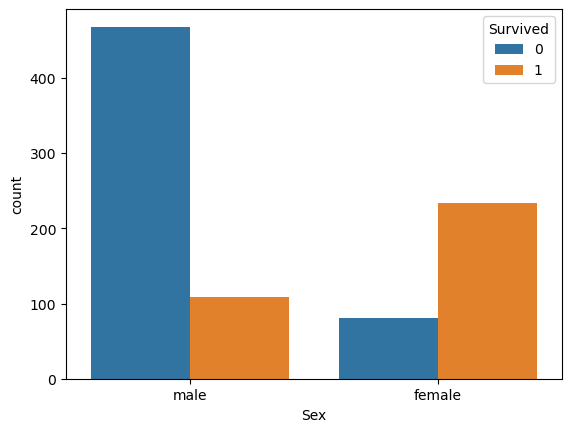

In [131]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [132]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [133]:
# 1 is live # 0 is not alive 
df1=df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

In [134]:
x=df1.drop(columns=['Pclass','Survived','Name','Cabin','Ticket','SibSp', 'Parch','Fare'])
y=df1['Survived']
x

,PassengerId,Sex,Age,Embarked
0,1,0,22.000000,0
1,2,1,38.000000,1
2,3,1,26.000000,0
3,4,1,35.000000,0
4,5,0,35.000000,0
...,...,...,...,...
886,887,0,27.000000,0
887,888,1,19.000000,0
888,889,1,29.699118,0
889,890,0,26.000000,1


In [135]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3)

In [137]:
x_train

,PassengerId,Sex,Age,Embarked
31,32,1,29.699118,1
681,682,0,27.000000,1
460,461,0,48.000000,0
399,400,1,28.000000,0
148,149,0,36.500000,0
...,...,...,...,...
822,823,0,38.000000,0
720,721,1,6.000000,0
694,695,0,60.000000,0
621,622,0,42.000000,0


In [138]:
x_test

,PassengerId,Sex,Age,Embarked
570,571,0,62.000000,0
429,430,0,32.000000,0
710,711,1,24.000000,1
303,304,1,29.699118,2
877,878,0,19.000000,0
...,...,...,...,...
167,168,1,45.000000,0
174,175,0,56.000000,1
37,38,0,21.000000,0
515,516,0,47.000000,0


In [139]:
y_train

31     1
681    1
460    1
399    1
148    0
      ..
822    0
720    1
694    0
621    1
827    1
Name: Survived, Length: 594, dtype: int64

In [140]:
y_test

570    1
429    1
710    1
303    1
877    0
      ..
167    0
174    0
37     0
515    0
875    1
Name: Survived, Length: 297, dtype: int64

In [141]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
mnb=MultinomialNB() 
model=LogisticRegression()
print(x_train.shape,y_train.shape)

(594, 4) (594,)


In [142]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [143]:
model.fit(x_train,y_train)

LogisticRegression()

In [144]:
yes=model.predict(x_train) 
no=mnb.predict(x_train)

In [145]:
yes1=model.predict(x_test) 
no1=mnb.predict(x_test)

In [146]:
yes

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,

In [147]:
no

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [148]:
print('accuracy',accuracy_score(y_train,yes)) 
print('accuracy',accuracy_score(y_train,no))

accuracy 0.7861952861952862
accuracy 0.6397306397306397


In [149]:
report = classification_report(y_train,yes) 
report

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       362\n           1       0.75      0.68      0.71       232\n\n    accuracy                           0.79       594\n   macro avg       0.78      0.77      0.77       594\nweighted avg       0.78      0.79      0.78       594\n'

In [150]:
report = classification_report(y_train,no)
report

'              precision    recall  f1-score   support\n\n           0       0.71      0.69      0.70       362\n           1       0.54      0.56      0.55       232\n\n    accuracy                           0.64       594\n   macro avg       0.62      0.62      0.62       594\nweighted avg       0.64      0.64      0.64       594\n'

In [151]:
model.predict([[264,0, 40.000000 ,0]])

C:\Users\mural\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [152]:
df1.head(265)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,B96 B98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
260,261,0,3,"Smith, Mr. Thomas",0,29.699118,0,0,384461,7.7500,B96 B98,2
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",0,3.000000,4,2,347077,31.3875,B96 B98,0
262,263,0,1,"Taussig, Mr. Emil",0,52.000000,1,1,110413,79.6500,E67,0
263,264,0,1,"Harrison, Mr. William",0,40.000000,0,0,112059,0.0000,B94,0


# Spam Email

In [1]:
import pandas as pd
file_path = 'spam.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', usecols=['v1', 'v2'])
print(data.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [9]:
#Data Preprocessing
!pip install nltk

In [19]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mural\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mural\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mural\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mural\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# Apply preprocessing to the 'v2' column 
data['processed_text'] = data['v2'].apply(preprocess_text)

# Display the processed text and original text for comparison
print("Original Text:")
print(data['v2'].head())
print("\nProcessed Text:")
print(data['processed_text'].head())

Original Text:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

Processed Text:
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4                  nah think go usf life around though
Name: processed_text, dtype: object


In [18]:
data

,v1,v2,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
# Separate features (processed text) and labels (v1 - spam/ham)
X = data['processed_text']
y = data['v1']

In [22]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model building

In [23]:
# Count Vectorization
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [24]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shapes of the resulting matrices
print("Count Vectorization - Training set shape:", X_train_count.shape)
print("Count Vectorization - Testing set shape:", X_test_count.shape)
print("\nTF-IDF Vectorization - Training set shape:", X_train_tfidf.shape)
print("TF-IDF Vectorization - Testing set shape:", X_test_tfidf.shape)

Count Vectorization - Training set shape: (4457, 6262)
Count Vectorization - Testing set shape: (1115, 6262)

TF-IDF Vectorization - Training set shape: (4457, 6262)
TF-IDF Vectorization - Testing set shape: (1115, 6262)


In [25]:
#navie bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

In [27]:
# Train the classifier using Count Vectorized features
nb_classifier.fit(X_train_count, y_train)

MultinomialNB()

In [28]:
#Model Evaluation
# Predict on the testing set
nb_pred_count = nb_classifier.predict(X_test_count)

In [29]:
# Evaluate performance
accuracy_count = accuracy_score(y_test, nb_pred_count)
print("Naive Bayes - Count Vectorization Accuracy:", accuracy_count)
print("\nClassification Report:")
print(classification_report(y_test, nb_pred_count))

Naive Bayes - Count Vectorization Accuracy: 0.9820627802690582

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.95      0.92      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [30]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Naive Bayes using Count Vectorization
nb_cv_scores_count = cross_val_score(nb_classifier, X_train_count, y_train, cv=5)
print("Naive Bayes - Count Vectorization Cross-Validation Scores:")
print(nb_cv_scores_count)
print("Mean Accuracy:", nb_cv_scores_count.mean())

Naive Bayes - Count Vectorization Cross-Validation Scores:
[0.9764574  0.97982063 0.97755331 0.97194164 0.96969697]
Mean Accuracy: 0.9750939892195498


In [31]:
# Confusion matrix for Naive Bayes with Count Vectorization
from sklearn.metrics import confusion_matrix

conf_matrix_nb_count = confusion_matrix(y_test, nb_pred_count)
print("\nConfusion Matrix - Naive Bayes with Count Vectorization:")
print(conf_matrix_nb_count)


Confusion Matrix - Naive Bayes with Count Vectorization:
[[957   8]
 [ 12 138]]


In [32]:
# Retrain the Naive Bayes classifier with the best parameters on the entire dataset
best_nb_classifier = MultinomialNB(alpha=1.0)  
X_full_count = count_vectorizer.fit_transform(X)  
y_full = data['v1']  

In [33]:
best_nb_classifier.fit(X_full_count, y_full)

MultinomialNB()

In [ ]:
#Prediction and Deployement

In [40]:
# Now, let's predict on new SMS messages
new_messages = [
    "U dun say so early hor... U c already then say...,,,",
    "Hey, are you free this weekend? Let's catch up.",
    "URGENT! You have won a 1 week FREE membership in our �100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18",
    "England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/̼1.20 POBOXox36504W45WQ 16+"
]

In [41]:
# Preprocess the new messages
preprocessed_new_messages = [preprocess_text(msg) for msg in new_messages]
# Vectorize the preprocessed new messages using the previously fitted CountVectorizer
X_new_count = count_vectorizer.transform(preprocessed_new_messages)
# Predict if the new messages are spam or ham
predictions = best_nb_classifier.predict(X_new_count)
# Display predictions
for message, prediction in zip(new_messages, predictions):
    print(f"Message: {message}")
    print(f"Prediction: {'Spam' if prediction == 'spam' else 'Ham'}")
    print()

Message: U dun say so early hor... U c already then say...,,,
Prediction: Ham

Message: Hey, are you free this weekend? Let's catch up.
Prediction: Ham

Message: URGENT! You have won a 1 week FREE membership in our �100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Prediction: Spam

Message: England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/̼1.20 POBOXox36504W45WQ 16+
Prediction: Spam

